# A- Data Preparation

In [1]:
import pandas as pd
df = pd.read_csv('spooky.csv')
df.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [2]:
df.loc[:,"text"]

0        This process, however, afforded me no means of...
1        It never once occurred to me that the fumbling...
2        In his left hand was a gold snuff box, from wh...
3        How lovely is spring As we looked from Windsor...
4        Finding nothing else, not even gold, the Super...
                               ...                        
19574    I could have fancied, while I looked at it, th...
19575    The lids clenched themselves together as if in...
19576    Mais il faut agir that is to say, a Frenchman ...
19577    For an item of news like this, it strikes us i...
19578    He laid a gnarled claw on my shoulder, and it ...
Name: text, Length: 19579, dtype: object

In [3]:
import spacy
import nltk
import wordcloud
import pywaffle
import textblob
import re

/home/chaima/.local/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# B- Text Cleaning

# 1- Removing duplicates

In [4]:
#removing dupliates
import re
from textblob import TextBlob
from textblob import Word
def remove_duplicates(text):
    rx = re.compile(r'([^\W\d_])\1{2,}')
    # tlga more than 3 consecutive chars then , [\W\d_] tn7i ay haja mhich character, then doubli chaque character w tdir correction lel word.
    return re.sub(r'[^\W\d_]+', lambda x: Word(rx.sub(r'\1\1', x.group())).correct() if rx.search(x.group()) else x.group(), text)
df['text']= df['text'].apply(lambda x:remove_duplicates(x))
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [5]:
remove_duplicates('cooool veeeeeryyyyyyyy gooooooooood')

'cool very good'

# 2- Hymogloph manipulation
'$tupide'--> 'Stupide'

In [6]:
import unicodedata
# nkfd decompose char into base
# encode: encode char into acsi , ignore char if not have acssi
# decode: decode encoded char into utf-8
def remove_accented_chars(text):
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [7]:
df['text']= df['text'].apply(lambda x:remove_accented_chars(x))


In [8]:
remove_accented_chars('Café au Lait is à très délicieux drink!')

'Cafe au Lait is a tres delicieux drink!'

In [9]:
def handle_special_chars(text):
    special_character_mapping = {
        '$': 'S',
        '@': 'A',
        '1': 'I',
        '3': 'E',
        '4': 'A',
        '!': 'I',
        '#': 'H',
        '+': 'T',
        '*': 'X',
        '&': 'E',
        '%': 'percent',
    }
    for special_char, original_char in special_character_mapping.items():
        text = text.replace(special_char, original_char)

    return text

In [10]:
handle_special_chars("$tupide @1mpressive! #NLP + H&ling special ch@racters*")

'Stupide AImpressiveI HNLP T HEling special chAractersX'

# 3-1 Detect and remove URLs

In [11]:
def urls_handling(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    return re.sub(pattern, '', text)
df['text']= df['text'].apply(lambda x:urls_handling(x))
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [12]:
test = "follow this website for more details www.knowmore.com and login to http://login.com"
urls_handling(test)

'follow this website for more details  and login to '

# 3-2 Detect and remove HTML tags

In [13]:
def remove_html_tags(text):
    return re.sub('<.*?>', '', text)
df['text']= df['text'].apply(lambda x:remove_html_tags(x))
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [14]:
test = "<p>follow this <b>website</b> for more details. </p>"
remove_html_tags(test)

'follow this website for more details. '

# 3-3 Detect and remove email IDs

In [15]:
def remove_emails(text):
    return re.sub('[\w\.-]+@[\w\.-]+\.\w+', '', text)
df['text']= df['text'].apply(lambda x:remove_emails(x))
df.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [16]:
test = "please send your feedback to myemail@gmail.com"
remove_emails(test)

'please send your feedback to '

# 4. Lowering the case

In [17]:
test= 'CHAIMA'
test.lower()

'chaima'

In [18]:
#lowering the case

df['text']= df['text'].apply(lambda x: x.lower())
df.head()

,id,text,author
0,id26305,"this process, however, afforded me no means of...",EAP
1,id17569,it never once occurred to me that the fumbling...,HPL
2,id11008,"in his left hand was a gold snuff box, from wh...",EAP
3,id27763,how lovely is spring as we looked from windsor...,MWS
4,id12958,"finding nothing else, not even gold, the super...",HPL


# 5-removing punctuation 

In [19]:
import string
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['text']= df['text'].apply(lambda x:remove_punctuation(x))
df.head()

,id,text,author
0,id26305,this process however afforded me no means of a...,EAP
1,id17569,it never once occurred to me that the fumbling...,HPL
2,id11008,in his left hand was a gold snuff box from whi...,EAP
3,id27763,how lovely is spring as we looked from windsor...,MWS
4,id12958,finding nothing else not even gold the superin...,HPL


In [20]:
test="i love u >??"
remove_punctuation(test)

'i love u '

# Removing stopwords

In [21]:
 #removing stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    en_stopwords=set(stopwords.words('english'))
    text = word_tokenize(text)
    text=[w.lower() for w in text ]
    words=[w for w in text if w not in en_stopwords]
    s = " "
    words=s.join(words)
    return words


In [22]:
df['text']= df['text'].apply(lambda x:remove_stopwords(x))
df.head()

,id,text,author
0,id26305,process however afforded means ascertaining di...,EAP
1,id17569,never occurred fumbling might mere mistake,HPL
2,id11008,left hand gold snuff box capered hill cutting ...,EAP
3,id27763,lovely spring looked windsor terrace sixteen f...,MWS
4,id12958,finding nothing else even gold superintendent ...,HPL


In [ ]:
df.to_csv('spooky_for_cbow.csv', index=False)

In [10]:
test='This is a very good  lesson'
remove_stopwords(test)

'good lesson'

# C- Tokenization

# On Spaces and punctuations

In [13]:
import string
from nltk.corpus import stopwords
import re
from textblob import TextBlob
from textblob import Word
import nltk
def tokenization(text):
    tokens = nltk.wordpunct_tokenize(text)
    return tokens
#df['text']= df['text'].apply(lambda x:tokenization(x))
#df.head()

In [29]:
test="i dont know. what am i doing sheeeeeeeeeeesh."
tokenization(test)

['i', 'dont', 'know', '.', 'what', 'am', 'i', 'doing', 'sheeeeeeeeeeesh', '.']

# Rule based tokenization

In [30]:
from nltk.tokenize import TreebankWordTokenizer
def rule_based_tokenization(text):
    tokenizer=TreebankWordTokenizer()
    return tokenizer.tokenize(text)

In [31]:
test="how come you don't drink milk? isn't that crazy."
rule_based_tokenization(test)

['how',
 'come',
 'you',
 'do',
 "n't",
 'drink',
 'milk',
 '?',
 'is',
 "n't",
 'that',
 'crazy',
 '.']

# subword based tokenization using byte pair encoding (BPE) 

In [1]:

from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

# Train the tokenizer on a corpus of text
def subword_tokenization(text):
    tokenizer = Tokenizer(BPE())
    tokenizer.pre_tokenizer = Whitespace()
    trainer = BpeTrainer(vocab_size=1000, min_frequency=2)
    tokenizer.train(["spooky.csv"], trainer=trainer)
    encoded = tokenizer.encode(text)
    return encoded.tokens



In [2]:
subword_tokenization("This is a sample sentences to be segmented into subwords.")

['This',
 'is',
 'a',
 's',
 'am',
 'ple',
 's',
 'ent',
 'en',
 'c',
 'es',
 'to',
 'be',
 'se',
 'g',
 'ment',
 'ed',
 'into',
 'sub',
 'words',
 '.']

In [5]:
df['text']= df['text'].apply(lambda x:subword_tokenization(x))
df.head()

KeyboardInterrupt: 

# Tokenization using Sentencepiece

In [21]:
import os
import sentencepiece as spm

In [22]:
if not os.path.isfile('reviews.model'):
    spm.SentencePieceTrainer.Train(input='spooky.csv' ,model_prefix='spooky', vocab_size=20000 ,split_by_whitespace=False)
 
sp = spm.SentencePieceProcessor()
sp.load('spooky.model')

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input: spooky.csv
  input_format: 
  model_prefix: spooky
  model_type: UNIGRAM
  vocab_size: 20000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 0
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differen

True

c(618) LOG(INFO) EM sub_iter=1 size=21922 obj=253.754 num_tokens=666772 num_tokens/piece=30.4157
trainer_interface.cc(687) LOG(INFO) Saving model: spooky.model
trainer_interface.cc(699) LOG(INFO) Saving vocabs: spooky.vocab


In [23]:
sentence = "The quick brown fox jumps over the lazy dog"
 
sp.EncodeAsPieces(sentence)

['▁The',
 '▁quick',
 '▁brown',
 '▁fo',
 'x',
 '▁jump',
 's',
 '▁over▁the',
 '▁la',
 'z',
 'y',
 '▁dog']

In [82]:
df['text']= df['text'].apply(lambda x:sp.EncodeAsPieces(x))

In [83]:
df.head()

,id,text,author
0,id26305,"[▁process, ▁how, ev, ▁afford, ▁mean, ▁ascertai...",EAP
1,id17569,"[▁never, ▁occur, ▁fumbl, ▁might, ▁mere, ▁mist,...",HPL
2,id11008,"[▁left▁hand, ▁gold, ▁snuff▁box, ▁cap, er, ▁hil...",EAP
3,id27763,"[▁love, ▁spring, ▁look, ▁winds, or, ▁, ter, ra...",MWS
4,id12958,"[▁find, ▁not, h, ▁, el, s, ▁even, ▁gold, ▁supe...",HPL


# D- named entity recognition using NLTK

In [43]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /home/chaima/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/chaima/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/chaima/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/chaima/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [23]:
def ner_nltk(text):
    tokens = nltk.word_tokenize(text) 
    tagged_tokens = nltk.pos_tag(tokens) # part of speech
    entities = nltk.ne_chunk(tagged_tokens)
    return entities

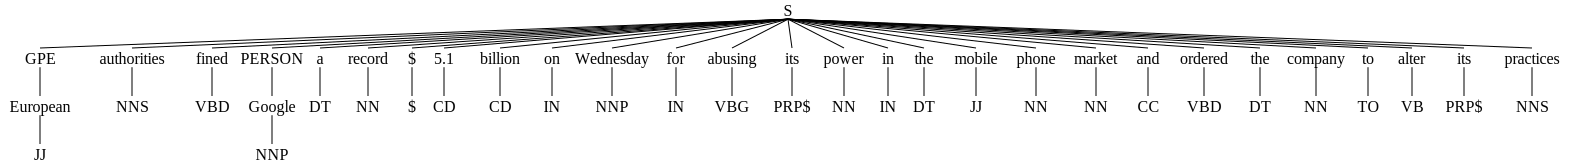

In [24]:
test = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
ner_nltk(test)

# -named entity recognition using Spacy

In [18]:

import spacy

# Load the Spacy English model
ner_spacy = spacy.load('en_core_web_sm')

In [25]:
test_spacy=ner_spacy(test)

In [26]:
from spacy import displacy
for word in test_spacy.ents:
    print(word.text,word.label_)

European NORP
Google ORG
$5.1 billion MONEY
Wednesday DATE


In [27]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

# E- Form Reduction

# Lemmatization with Spacy (it doesnt have a vuild in function for stemming)

In [29]:
for token in test_spacy:
    print(token.text + "-->" + token.lemma_)

European-->european
authorities-->authority
fined-->fine
Google-->Google
a-->a
record-->record
$-->$
5.1-->5.1
billion-->billion
on-->on
Wednesday-->Wednesday
for-->for
abusing-->abuse
its-->its
power-->power
in-->in
the-->the
mobile-->mobile
phone-->phone
market-->market
and-->and
ordered-->order
the-->the
company-->company
to-->to
alter-->alter
its-->its
practices-->practice


# Stemming and Lemmatization using NLTK 

In [30]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
   
porter_stemmer = PorterStemmer()
words = word_tokenize(test)
print("Stemming:")
print("=========")
for w in words:
    print(w, " --> ", porter_stemmer.stem(w))
     

Stemming:
This  -->  thi
is  -->  is
a  -->  a
very  -->  veri
good  -->  good
lesson  -->  lesson


In [35]:
def port_stem(text):
    for t in text:
        t=porter_stemmer.stem(text)
    return text

In [31]:
from nltk.stem import WordNetLemmatizer
print("\nLemmatization:")
print("==============")
lemmatizer = WordNetLemmatizer()
for w in words:
    print(w, " -->", lemmatizer.lemmatize(w))


Lemmatization:
This  --> This
is  --> is
a  --> a
very  --> very
good  --> good
lesson  --> lesson


In [26]:
def lemmatize_tokens(text):
    return [lemmatizer.lemmatize(token) for token in text]

In [37]:
df['text']=df['text'].apply(lambda x:lemmatize_tokens(x))

AttributeError: 'list' object has no attribute 'lower'

In [39]:
df['text']

0        [▁process, ▁however, ▁afforded, ▁means, ▁ascer...
1        [▁never, ▁occurred, ▁fumbl, ing, ▁might, ▁mere...
2        [▁left▁hand, ▁gold, ▁snuff▁box, ▁cap, ered, ▁h...
3        [▁lovely, ▁spring, ▁looked, ▁winds, or, ▁terra...
4        [▁find, ing, ▁nothing▁else, ▁even, ▁gold, ▁s, ...
                               ...                        
19574    [▁could, ▁fancied, ▁looked, ▁eminent, ▁landsca...
19575                [▁lids, ▁clenched, ▁together, ▁spasm]
19576    [▁ma, is, ▁il▁faut, ▁a, g, ir, ▁say, ▁f, r, en...
19577    [▁item, ▁new, s, ▁like, ▁strike, s▁us, ▁cool, ...
19578    [▁laid, ▁gnarled, ▁claw, ▁should, er, ▁seemed,...
Name: text, Length: 19579, dtype: object

In [40]:
from nltk.stem.snowball import SnowballStemmer

In [78]:
snow_stemmer = SnowballStemmer(language='english')
def snow_stem(text):
    text = word_tokenize(text)
    text=[w.lower() for w in text ]
    words=[snow_stemmer.stem(w) for w in text ]
    s = " "
    words=s.join(words)
    return words

In [79]:
snow_stem('process however afforded me a very nice meal')

'process howev afford me a veri nice meal'

In [80]:
df['text']=df['text'].apply(lambda x:snow_stem(x))

In [81]:
df.head()

,id,text,author
0,id26305,process howev afford mean ascertain dimens dun...,EAP
1,id17569,never occur fumbl might mere mistak,HPL
2,id11008,left hand gold snuff box caper hill cut manner...,EAP
3,id27763,love spring look windsor terrac sixteen fertil...,MWS
4,id12958,find noth els even gold superintend abandon at...,HPL


# F- Frequeny Analysis

# 1-  Compute number of phrases for each author where appeared the word "GREAT".

In [64]:

def count_sentences_with_word(word, dataset_path):
    df = pd.read_csv(dataset_path)
    authors = ["EAP", "HPL", "MWS"]
    results = {author: 0 for author in authors}
    for author in authors:
        # Extract the texts for the author
        texts = df[df.author == author].text.tolist()
        # Loop over each text
        for text in texts:
            # Tokenize the text into sentences
            sentences = nltk.sent_tokenize(text)
            # Loop over each sentence
            for sentence in sentences:
                # Check if the sentence contains the word
                if word.lower() in sentence.lower():
                    # Increment the count for the author
                    results[author] += 1
    return results

In [65]:
great_count=count_sentences_with_word("Great", "spooky.csv")
great_count


{'EAP': 296, 'HPL': 235, 'MWS': 153}

# 2- Pywaffle graph

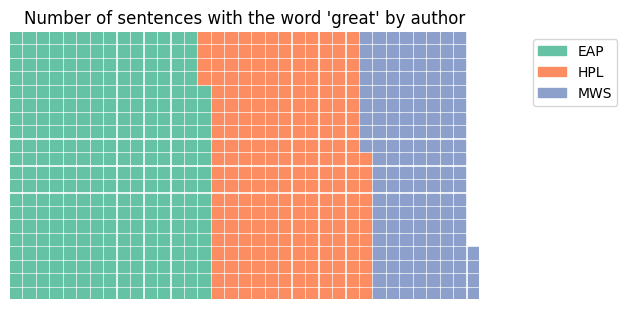

In [71]:
from pywaffle import Waffle
import matplotlib.pyplot as plt

# Plot the results as a bar chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=20,
    values=great_count,
    labels=list(great_count.keys()),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.title("Number of sentences with the word 'great' by author")
plt.show()


# 3- Compute number of phrases for each author where appeared the word "IMPOSSIBLE".

In [68]:
impossible_count=count_sentences_with_word("impossible", "spooky.csv")
impossible_count

{'EAP': 62, 'HPL': 16, 'MWS': 19}

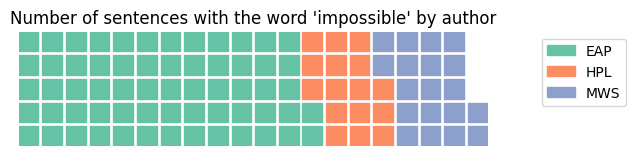

In [69]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=impossible_count,
    labels=list(impossible_count.keys()),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)
plt.title("Number of sentences with the word 'impossible' by author")
plt.show()

# 4-three word clouds to represent the most used words by each author.

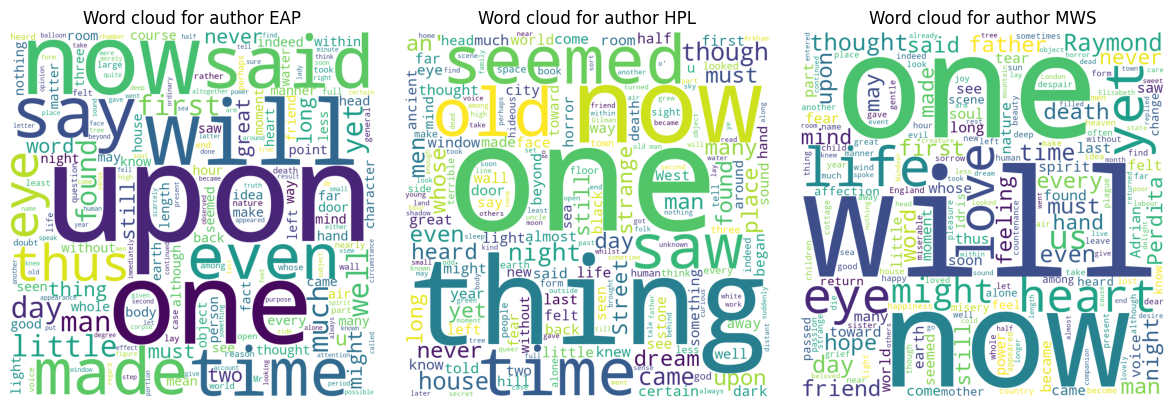

In [76]:
from wordcloud import WordCloud
df = pd.read_csv("spooky.csv")
authors = ["EAP", "HPL", "MWS"]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Loop over each author in the dataset
for i, author in enumerate(authors):
    # Extract the texts for the author
    texts = df[df.author == author].text.tolist()
    # Combine the texts into a single string
    text = " ".join(texts)
    # Create a word cloud for the author
    wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
    # Plot the word cloud on the respective subplot
    axes[i].imshow(wordcloud)
    axes[i].axis("off")
    axes[i].set_title("Word cloud for author " + author)

# Adjust layout for better visualization
plt.tight_layout()
plt.show()


# 5- display the top 100 positive and negative words used by the authors.

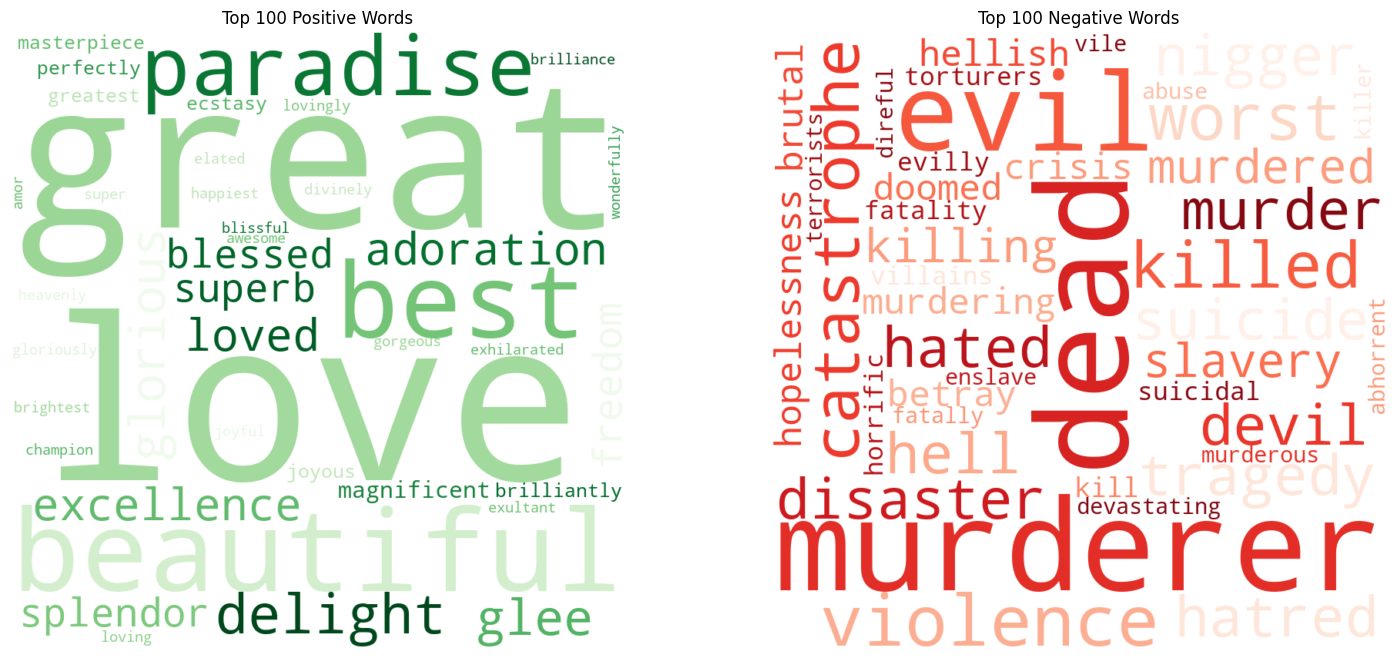

In [2]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Load the dataset
df = pd.read_csv("spooky.csv")
all_texts = " ".join(df['text'].tolist())
words = all_texts.lower().split()

sia = SentimentIntensityAnalyzer()
sentiment_scores = {word: sia.polarity_scores(word)['compound'] for word in words}

# Get the top 100 positive and negative words
top_positive_words = sorted(sentiment_scores, key=sentiment_scores.get, reverse=True)[:100]
top_negative_words = sorted(sentiment_scores, key=sentiment_scores.get)[:100]

# Create word clouds for positive and negative words
positive_text = " ".join(top_positive_words)
negative_text = " ".join(top_negative_words)

fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot positive word cloud
wordcloud_positive = WordCloud(width=800, height=800, background_color='white', colormap='Greens').generate(positive_text)
axes[0].imshow(wordcloud_positive, interpolation='bilinear')
axes[0].axis("off")
axes[0].set_title("Top 100 Positive Words")

# Plot negative word cloud
wordcloud_negative = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate(negative_text)
axes[1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1].axis("off")
axes[1].set_title("Top 100 Negative Words")

plt.show()


In [92]:
df=df.drop("id", axis='columns')

In [84]:
df.to_csv('spooky_preprocessed.csv', index=False)

In [93]:
df

,text,author
0,"[▁process, ▁how, ev, ▁afford, ▁mean, ▁ascertai...",EAP
3,"[▁love, ▁spring, ▁look, ▁winds, or, ▁, ter, ra...",MWS
4,"[▁find, ▁not, h, ▁, el, s, ▁even, ▁gold, ▁supe...",HPL
5,"[▁youth, ▁pass, ▁so, lit, ud, ▁best, ▁year, ▁s...",MWS
6,"[▁astronom, ▁per, h, ap, ▁point, ▁took, ▁refu,...",EAP
...,...,...
19574,"[▁could, ▁fan, c, i, ▁look, ▁, em, in, ▁lands,...",EAP
19575,"[▁l, id, ▁c, l, ench, ▁to, ge, th, ▁spasm]",EAP
19576,"[▁ma, i, ▁il▁faut, ▁a, g, ir, ▁say, ▁f, r, enc...",EAP
19577,"[▁item, ▁new, s, ▁like, ▁strike, ▁us, ▁cool, l...",EAP
